<a href="https://colab.research.google.com/github/dwipratiwiaprilya/ProyekAnalisisData/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Dwi Pratiwi Aprilya Wahid
- **Email:** dwi.prty3@gmail.com
- **ID Dicoding:** dwipratiwiaprilya

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan bulanan selama satu tahun terakhir?
- Produk apa yang paling banyak dan sedikit terjual?
- Bagaimana demografi pelanggan?
- Berapa persentase pesanan yang dikirim tepat waktu dibandingkan dengan yang terlambat?
- Apa jenis pembayaran yang paling umum digunakan oleh pelanggan?
- Berapa rata-rata waktu pengiriman yang diperlukan setiap negara bagian?








## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### customer_df

In [2]:
customer_df=pd.read_csv("https://raw.githubusercontent.com/dwipratiwiaprilya/ProyekAnalisisData/refs/heads/main/data/customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### orders_df

In [3]:
orders_df=pd.read_csv("https://raw.githubusercontent.com/dwipratiwiaprilya/ProyekAnalisisData/refs/heads/main/data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### products_df

In [4]:
products_df=pd.read_csv("https://raw.githubusercontent.com/dwipratiwiaprilya/ProyekAnalisisData/refs/heads/main/data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### orders_items_df

In [5]:
orders_items_df=pd.read_csv("https://raw.githubusercontent.com/dwipratiwiaprilya/ProyekAnalisisData/refs/heads/main/data/order_items_dataset.csv")
orders_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### orders_payment_df

In [6]:
orders_payment_df=pd.read_csv("https://raw.githubusercontent.com/dwipratiwiaprilya/ProyekAnalisisData/refs/heads/main/data/order_payments_dataset.csv")
orders_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Membaca data yang akan digunakan selama proses analysis,adapun data yang digunakan ada 5 yakni customer,order,product,orders item dan payment
- Data tersebut disimpan di gtihub dan diakses melalui link raw
- Setelah tahap ini, data akan melalui proses assessing data yakni mengindetifikasi masalah yang terdapat dalam data seperti outlier,missing value,duplicate.

### Assessing Data

#### Melakukan Penilaian Terhadap tabel customer_df



In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
customer_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [9]:
print("Jumlah Duplikasi: ", customer_df.duplicated().sum())
customer_df.describe()

Jumlah Duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Melakukan Penilaian Terhadap Tabel orders_df

In [10]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [11]:
orders_df.nunique()

,0
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90733
order_delivered_carrier_date,81018
order_delivered_customer_date,95664
order_estimated_delivery_date,459


In [12]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [13]:
print("jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Melakukan Penilaian Terhadap Tabel products_df

In [14]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [15]:
print("jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [16]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


#### Melakukan Penilaian Terhadap Tabel orders_item_df

In [17]:
orders_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
print("jumlah duplikasi: ", orders_items_df.duplicated().sum())
orders_items_df.describe()

jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Melakukan Penilaian Terhadap Tabel orders_payment_df

In [19]:
orders_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [20]:
duplicate=orders_payment_df.duplicated().any()
print(duplicate)
orders_payment_df.describe()

False


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [21]:
orders_payment_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


**Insight:**
- Setelah melalui prosses assessing,kita dapat mengidentifikasi masalah apa yang terdapat dalam data dan harus diatasi pada data cleaning
- customer_df,item_df,orders_payment_dftidak terdapat missing value maupun duplivate data akan tetapi kolom yang tidak digunakan akan dihapus di tahap selanjutnya
- products_df,orders_df terdapat missing value dan kolom yang harus dihapus juga

### Cleaning Data

#### Membersihkan tabel customer_df

#####Menghapus kolom yang tidak dibutuhkan

In [22]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [23]:
customer_df = customer_df.drop(columns=['customer_unique_id', 'customer_zip_code_prefix'])
customer_df.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


#### Membersihkan tabel orders_df

#####Menghapus kolom yang tidak dibutuhkan

In [24]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [25]:
orders_df = orders_df.drop(columns=['order_approved_at', 'order_delivered_carrier_date'])
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26 00:00:00


#####Mengubah Type Data

In [26]:
data_columns=["order_purchase_timestamp", "order_delivered_customer_date","order_estimated_delivery_date"]
orders_df[data_columns]=orders_df[data_columns].apply(pd.to_datetime)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_delivered_customer_date  96476 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 4.6+ MB


In [27]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26


#####Missing Value

In [28]:
orders_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [29]:
average_date = orders_df['order_delivered_customer_date'].mean()
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(average_date)
orders_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


#### Membersihkan tabel products_df

#####Menghapus kolom yang tidak dibutuhkan

In [30]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [31]:
products_df = products_df.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])
products_df.head()


,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


##### Missing Value

In [32]:
products_df.isnull().sum()

,0
product_id,0
product_category_name,610


In [33]:
# mencari nilai mode atau katgeori yang sring muncul
produk_category_name_mode = products_df["product_category_name"].mode()[0]
print("Kategori terbanyak:", produk_category_name_mode)

# Mengisi nilai kosong dengan mode
products_df["product_category_name"].fillna(produk_category_name_mode, inplace=True)

Kategori terbanyak: cama_mesa_banho


In [34]:
products_df.describe()

,product_id,product_category_name
count,32951,32951
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3639


In [35]:
products_df.isnull().sum()

,0
product_id,0
product_category_name,0


#### Membersihkan tabel orders_item_df



#####Menghapus kolom yang tidak dibutuhkan

In [36]:
orders_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [37]:
orders_items_df =orders_items_df.drop(columns=["seller_id","shipping_limit_date","freight_value"])
orders_items_df.head()

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


#### Membersihkan tabel orders_payment_df

#####Menghapus kolom yang tidak dibutuhkan

In [38]:
orders_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [39]:
orders_payment_df =orders_payment_df.drop(columns=['payment_sequential', 'payment_installments'])
orders_items_df.head()

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


**Insight:**
- Pada tahap cleaning masalah yang terdapat di assesing data akan diatasi dengan cara menghapus kolom,mengubah type data yang tidak sesuai pada table orders_df dan mengatasi missing value dengan menggunakan fillna()
- Tahap cleaning terdiri atas 3 tahap yakni: Define,Code dan test.

## Exploratory Data Analysis (EDA)

### Explore customer_df

In [40]:
customer_df.head(5)

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


In [41]:
customer_df.describe(include="all")

,customer_id,customer_city,customer_state
count,99441,99441,99441
unique,99441,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,sao paulo,SP
freq,1,15540,41746


In [42]:
customer_df.customer_id.is_unique

True

In [43]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [44]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### Explore orders_df

In [45]:
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26


In [46]:
orders_df.describe()

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441
mean,2017-12-31 08:43:12.776581120,2018-01-14 12:09:19.035543040,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-10-01 16:54:44,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-27 14:47:23,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-14 13:58:54,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-10-17 13:22:46,2018-11-12 00:00:00


In [47]:
orders_df['status_pengiriman'] = orders_df.apply(
    lambda row: 'Tepat Waktu' if row['order_delivered_customer_date'] <= row['order_estimated_delivery_date']
    else 'Terlambat', axis=1
)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,status_pengiriman
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,Tepat Waktu
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,Tepat Waktu
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,Tepat Waktu
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,Tepat Waktu
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,Tepat Waktu


In [48]:
orders_df.groupby(by="status_pengiriman").order_id.nunique().sort_values(ascending=False)

,order_id
status_pengiriman,
Tepat Waktu,89934
Terlambat,9507


In [49]:
orders_df.order_id.is_unique

True

### Explore products_df

In [50]:
products_df.head(5)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [51]:
products_df.describe()

,product_id,product_category_name
count,32951,32951
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3639


In [52]:
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

,product_id
product_category_name,
cama_mesa_banho,3639
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
casa_conforto_2,5
fashion_roupa_infanto_juvenil,5
pc_gamer,3


### Explore orders_item_df

In [53]:
orders_items_df.head(5)

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


In [54]:
orders_items_df.describe()

,order_item_id,price
count,112650.000000,112650.000000
mean,1.197834,120.653739
std,0.705124,183.633928
min,1.000000,0.850000
25%,1.000000,39.900000
50%,1.000000,74.990000
75%,1.000000,134.900000
max,21.000000,6735.000000


In [55]:
orders_items_df.groupby(by="order_id").agg({
    "order_item_id": "count",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,order_item_id,price
order_id,,
03caa2c082116e1d31e67e9ae3700499,8,13440.00
736e1922ae60d0d6a89247b851902527,4,7160.00
0812eb902a67711a1cb742b3cdaa65ae,1,6735.00
fefacc66af859508bf1a7934eab1e97f,1,6729.00
f5136e38d1a14a4dbd87dff67da82701,1,6499.00
...,...,...
38bcb524e1c38c2c1b60600a80fc8999,1,2.90
e8bbc1d69fee39eee4c72cb5c969e39d,1,2.29
f1d5c2e6867fa93ceee9ef9b34a53cbf,1,2.20


### Eksplorasi orders_payment_df

In [57]:
orders_payment_df.head(5)

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45


In [58]:
orders_payment_df.describe()

,payment_value
count,103886.000000
mean,154.100380
std,217.494064
min,0.000000
25%,56.790000
50%,100.000000
75%,171.837500
max,13664.080000


In [59]:
orders_payment_df.shape[0]

103886

In [60]:
orders_payment_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [61]:
orders_payment_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

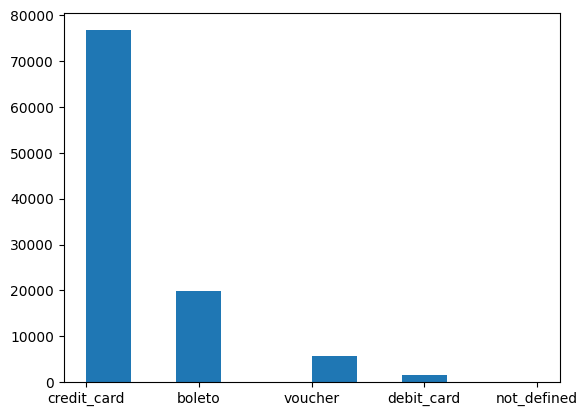

In [62]:
plt.hist(orders_payment_df["payment_type"], bins=10)
plt.show()

###Eksplor semua data

##### Menggabungkan semua data

###### customer_df + orders_df=customer_orders_df

In [64]:
customer_orders_df = pd.merge(customer_df, orders_df, on="customer_id")
customer_orders_df.head()

,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,status_pengiriman
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05,Tepat Waktu
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06,Tepat Waktu
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13,Terlambat
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10,Tepat Waktu
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15,Tepat Waktu


In [65]:
customer_orders_df.isna().sum()

,0
customer_id,0
customer_city,0
customer_state,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
status_pengiriman,0


In [66]:
customer_orders_df.duplicated().sum()

0

###### products_df + orders_item_df = products_orders_df

In [67]:
products_orders_df = pd.merge(products_df, orders_items_df, on="product_id")
products_orders_df.head()

,product_id,product_category_name,order_id,order_item_id,price
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,10.91
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,1,248.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,1,79.80
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,112.30
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,1,37.90


In [68]:
products_orders_df.isna().sum()

,0
product_id,0
product_category_name,0
order_id,0
order_item_id,0
price,0


In [69]:
products_orders_df.duplicated().sum()

0

###### products_orders_df + customer_orders+orders_payment=all_df

In [70]:
merged_df = pd.merge(products_orders_df, customer_orders_df, on='order_id', how='inner')
df = pd.merge(merged_df, orders_payment_df, on='order_id', how='inner')
df.head()

,product_id,product_category_name,order_id,order_item_id,price,customer_id,customer_city,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,status_pengiriman,payment_type,payment_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,10.91,f8a3e963a310aa58b60a5b1fed5bceb5,mogi-guacu,SP,delivered,2018-04-24 16:16:53,2018-04-27 16:42:17,2018-05-09,Tepat Waktu,debit_card,18.30
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,1,248.00,03fc97548af8f58fefc768d12b546c9c,rio de janeiro,RJ,delivered,2018-01-31 18:55:36,2018-02-16 13:27:08,2018-02-22,Tepat Waktu,voucher,265.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,1,79.80,e41819d1c95c12c9ce495b630eab8aee,sao paulo,SP,delivered,2018-07-09 21:18:01,2018-07-11 23:24:16,2018-07-18,Tepat Waktu,credit_card,87.62
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,112.30,322162b5ca010c2b059cb5224dd818b1,sao paulo,SP,delivered,2018-08-03 08:55:50,2018-08-06 15:14:32,2018-08-08,Tepat Waktu,credit_card,121.84
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,1,37.90,c11c31965ff02cc1d7132df8edfcbc22,sao paulo,SP,delivered,2018-04-11 01:06:37,2018-04-13 22:41:44,2018-04-26,Tepat Waktu,credit_card,46.19


In [71]:
df.isna().sum()

,0
product_id,0
product_category_name,0
order_id,0
order_item_id,0
price,0
customer_id,0
customer_city,0
customer_state,0
order_status,0
order_purchase_timestamp,0


In [72]:
df.duplicated().sum()

686

In [73]:
df.drop_duplicates(inplace=True)

In [74]:
df.duplicated().sum()

0

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116915 entries, 0 to 117600
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     116915 non-null  object        
 1   product_category_name          116915 non-null  object        
 2   order_id                       116915 non-null  object        
 3   order_item_id                  116915 non-null  int64         
 4   price                          116915 non-null  float64       
 5   customer_id                    116915 non-null  object        
 6   customer_city                  116915 non-null  object        
 7   customer_state                 116915 non-null  object        
 8   order_status                   116915 non-null  object        
 9   order_purchase_timestamp       116915 non-null  datetime64[ns]
 10  order_delivered_customer_date  116915 non-null  datetime64[ns]
 11  order

In [76]:
df.describe()

,order_item_id,price,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_value
count,116915.000000,116915.000000,116915,116915,116915,116915.000000
mean,1.195937,120.805822,2017-12-30 20:16:57.180002816,2018-01-13 11:20:36.506433536,2018-01-23 16:54:41.645639936,173.503818
min,1.000000,0.850000,2016-09-04 21:15:19,2016-10-11 13:46:32,2016-10-20 00:00:00,0.000000
25%,1.000000,39.900000,2017-09-12 11:47:07,2017-09-28 17:08:26,2017-10-03 00:00:00,61.590000
50%,1.000000,74.900000,2018-01-18 16:37:53,2018-01-29 15:37:38,2018-02-15 00:00:00,108.860000
75%,1.000000,134.900000,2018-05-03 23:51:46,2018-05-14 13:05:24,2018-05-25 00:00:00,189.720000
max,21.000000,6735.000000,2018-09-03 09:06:57,2018-10-17 13:22:46,2018-10-25 00:00:00,13664.080000
std,0.698358,184.488721,NaN,NaN,NaN,268.129952


In [77]:
df.head()

,product_id,product_category_name,order_id,order_item_id,price,customer_id,customer_city,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,status_pengiriman,payment_type,payment_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,10.91,f8a3e963a310aa58b60a5b1fed5bceb5,mogi-guacu,SP,delivered,2018-04-24 16:16:53,2018-04-27 16:42:17,2018-05-09,Tepat Waktu,debit_card,18.30
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,1,248.00,03fc97548af8f58fefc768d12b546c9c,rio de janeiro,RJ,delivered,2018-01-31 18:55:36,2018-02-16 13:27:08,2018-02-22,Tepat Waktu,voucher,265.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,1,79.80,e41819d1c95c12c9ce495b630eab8aee,sao paulo,SP,delivered,2018-07-09 21:18:01,2018-07-11 23:24:16,2018-07-18,Tepat Waktu,credit_card,87.62
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,112.30,322162b5ca010c2b059cb5224dd818b1,sao paulo,SP,delivered,2018-08-03 08:55:50,2018-08-06 15:14:32,2018-08-08,Tepat Waktu,credit_card,121.84
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,1,37.90,c11c31965ff02cc1d7132df8edfcbc22,sao paulo,SP,delivered,2018-04-11 01:06:37,2018-04-13 22:41:44,2018-04-26,Tepat Waktu,credit_card,46.19


In [78]:
df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "price": ["min", "max"],
    "payment_value": ["min", "max"]
})

order_id  price          payment_value          
                           nunique    min      max           min       max
product_category_name                                                     
agro_industria_e_comercio      182  12.99  2990.00          2.35   6081.54
alimentos                      450   9.99   274.99          2.09    437.59
alimentos_bebidas              227   6.50   699.90          4.35    720.77
artes                          202   3.50  6499.00          5.54   6726.66
artes_e_artesanato              23   9.80   289.49         23.88    314.32
...                            ...    ...      ...           ...       ...
sinalizacao_e_seguranca        140   4.50   740.00          8.13   3242.84
tablets_impressao_imagem        79  14.90   889.99         10.70    912.79
telefonia                     4199   5.00  2428.00          0.01   2457.44
telefonia_fixa                 217   6.00  1790.00          3.49  13664.08
utilidades_domesticas         5884   3.06  6735.00          0.01   6929.31

[73 rows x 5 columns]

In [79]:
df.groupby(by=["customer_state","product_category_name"]).agg({
    "order_id": "nunique",
    "price": ["min", "max"],
    "payment_value": ["min", "max"]
})

order_id    price           \
                                            nunique      min      max   
customer_state product_category_name                                    
AC             artigos_de_natal                   1    69.90    69.90   
               automotivo                         4    45.00   285.00   
               bebes                              3   119.90   388.00   
               beleza_saude                       6    12.90   527.90   
               brinquedos                         3    49.90   109.90   
...                                             ...      ...      ...   
TO             portateis_casa_forno_e_cafe        1  1999.00  1999.00   
               relogios_presentes                27    29.00   799.00   
               telefonia                         20    14.90   364.98   
               telefonia_fixa                     2    10.99  1380.00   
               utilidades_domesticas             12     9.90   439.00   

                                           payment_value           
                                                     min      max  
customer_state product_category_name                               
AC             artigos_de_natal                   130.85   130.85  
               automotivo                          44.01   312.02  
               bebes                              147.59   426.08  
               beleza_saude                        55.28   591.88  
               brinquedos                          75.28   140.20  
...                                                  ...      ...  
TO             portateis_casa_forno_e_cafe       2094.44  2094.44  
               relogios_presentes                  54.63   841.28  
               telefonia                           37.12   404.22  
               telefonia_fixa                      28.77  1415.80  
               utilidades_domesticas               14.72   510.78  

[1368 rows x 5 columns]

In [80]:
df.groupby(by="customer_city").agg({
    "order_id": "nunique",
    "payment_value": ["min", "max"],
    "price": ["min", "max"]
})


order_id payment_value            price         
                     nunique           min      max     min      max
customer_city                                                       
abadia dos dourados        3         58.28   219.63   39.90   199.00
abadiania                  1       1025.52  1025.52  949.99   949.99
abaete                    12         50.27   466.89   36.90   449.00
abaetetuba                11         31.94  1537.04   19.90  1500.00
abaiara                    2        131.70   200.45   93.90   169.00
...                      ...           ...      ...     ...      ...
xinguara                   9         57.28   608.67   14.90   568.00
xique-xique                3         48.69   124.09   31.90   106.90
zacarias                   2         68.41   161.44   55.00   143.80
ze doca                    5         66.51   408.04   39.90   359.00
zortea                     2         46.69    90.88   29.90    69.90

[4110 rows x 5 columns]

**Insight:**
- Tren Penjualan Bulanan: Dapat dianalisis dengan mengelompokkan data berdasarkan bulan pembelian dan menghitung jumlah order atau total revenue. Melihat pola musiman atau tren peningkatan/penurunan penjualan.
- Produk Terlaris dan Terlemah: Dengan mengelompokkan berdasarkan 'product_id' atau 'product_category_name', kemudian menghitung jumlah order atau total revenue. Dapat diidentifikasi produk mana yang paling banyak dan sedikit terjual.
- Demografi Pelanggan: Dapat dianalisis dengan melihat distribusi pelanggan berdasarkan kota ('customer_city') atau negara bagian ('customer_state'). Dapat diidentifikasi daerah mana yang memiliki jumlah pelanggan terbanyak.
- Persentase Pengiriman Tepat Waktu dan Terlambat: Dengan menghitung jumlah order yang memiliki 'order_delivered_customer_date' kurang dari atau sama dengan 'order_estimated_delivery_date' (tepat waktu) dan lebih besar (terlambat). Dapat diidentifikasi perbandingan antara pengiriman tepat waktu dan terlambat.
- Jenis Pembayaran Paling Umum: Dengan mengelompokkan data berdasarkan 'payment_type' dan menghitung jumlah order. Dapat diidentifikasi jenis pembayaran yang paling sering digunakan.
- Rata-rata Waktu Pengiriman Berdasarkan Negara Bagian: Dengan menghitung selisih antara 'order_delivered_customer_date' dan 'order_purchase_timestamp', kemudian mengelompokkan berdasarkan 'customer_state'. Dapat diidentifikasi rata-rata waktu pengiriman untuk setiap negara bagian.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualan bulanan selama satu tahun terakhir?

In [81]:
df.head()

,product_id,product_category_name,order_id,order_item_id,price,customer_id,customer_city,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,status_pengiriman,payment_type,payment_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,10.91,f8a3e963a310aa58b60a5b1fed5bceb5,mogi-guacu,SP,delivered,2018-04-24 16:16:53,2018-04-27 16:42:17,2018-05-09,Tepat Waktu,debit_card,18.30
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,1,248.00,03fc97548af8f58fefc768d12b546c9c,rio de janeiro,RJ,delivered,2018-01-31 18:55:36,2018-02-16 13:27:08,2018-02-22,Tepat Waktu,voucher,265.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,1,79.80,e41819d1c95c12c9ce495b630eab8aee,sao paulo,SP,delivered,2018-07-09 21:18:01,2018-07-11 23:24:16,2018-07-18,Tepat Waktu,credit_card,87.62
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,112.30,322162b5ca010c2b059cb5224dd818b1,sao paulo,SP,delivered,2018-08-03 08:55:50,2018-08-06 15:14:32,2018-08-08,Tepat Waktu,credit_card,121.84
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,1,37.90,c11c31965ff02cc1d7132df8edfcbc22,sao paulo,SP,delivered,2018-04-11 01:06:37,2018-04-13 22:41:44,2018-04-26,Tepat Waktu,credit_card,46.19


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116915 entries, 0 to 117600
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     116915 non-null  object        
 1   product_category_name          116915 non-null  object        
 2   order_id                       116915 non-null  object        
 3   order_item_id                  116915 non-null  int64         
 4   price                          116915 non-null  float64       
 5   customer_id                    116915 non-null  object        
 6   customer_city                  116915 non-null  object        
 7   customer_state                 116915 non-null  object        
 8   order_status                   116915 non-null  object        
 9   order_purchase_timestamp       116915 non-null  datetime64[ns]
 10  order_delivered_customer_date  116915 non-null  datetime64[ns]
 11  order

In [83]:
pesanan_bulanan_df = df.resample('M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).reset_index()

pesanan_bulanan_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

data_2018 = pesanan_bulanan_df[pesanan_bulanan_df['order_purchase_timestamp'].dt.year == 2018].copy()
data_2018['month'] = data_2018['order_purchase_timestamp'].dt.strftime('%B')
data_2018 = data_2018[['month', 'order_count', 'revenue']]

data_2018


,month,order_count,revenue
16,January,7220,1406090.59
17,February,6694,1305725.27
18,March,7188,1474590.40
19,April,6934,1495848.96
20,May,6853,1505623.85
21,June,6160,1295890.26
22,July,6273,1351099.13
23,August,6452,1227756.92
24,September,1,166.46


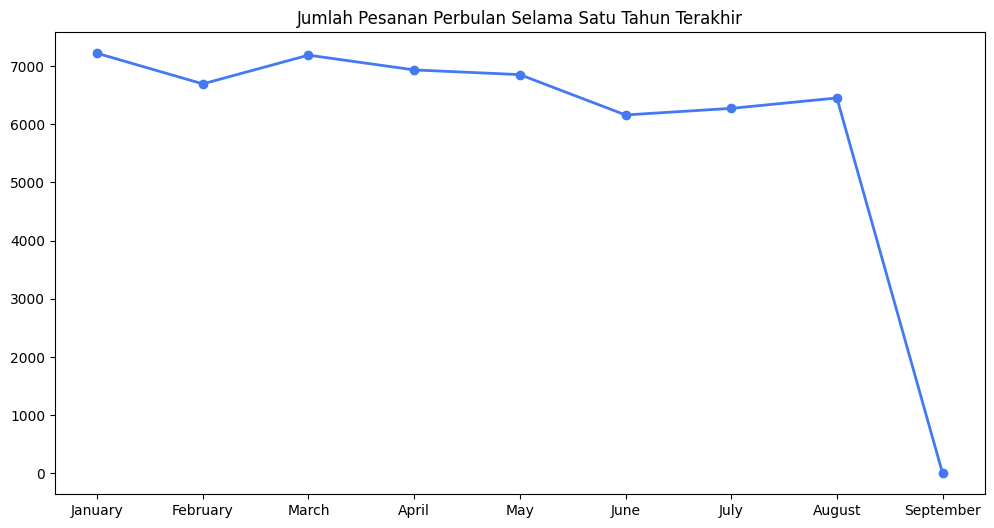

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(data_2018['month'], data_2018['order_count'], marker='o', linewidth=2, color="#4379F2")
plt.title('Jumlah Pesanan Perbulan Selama Satu Tahun Terakhir')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


**Insight:**
- Mengetahui tren penjualan bulan selama satu tahun terakhi yakni pada tahun 2018 yang dimulai bulan januari sampai September
- Mengetahui bulan berapa penjualan melonjak dan menurun berdasarkan hasil visualisasi

### Pertanyaan 2: Apa kategori produk yang menghasilkan pendapatan tertinggi dan terendah bagi perusahaan?

In [85]:
df.head()

,product_id,product_category_name,order_id,order_item_id,price,customer_id,customer_city,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,status_pengiriman,payment_type,payment_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,10.91,f8a3e963a310aa58b60a5b1fed5bceb5,mogi-guacu,SP,delivered,2018-04-24 16:16:53,2018-04-27 16:42:17,2018-05-09,Tepat Waktu,debit_card,18.30
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,1,248.00,03fc97548af8f58fefc768d12b546c9c,rio de janeiro,RJ,delivered,2018-01-31 18:55:36,2018-02-16 13:27:08,2018-02-22,Tepat Waktu,voucher,265.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,1,79.80,e41819d1c95c12c9ce495b630eab8aee,sao paulo,SP,delivered,2018-07-09 21:18:01,2018-07-11 23:24:16,2018-07-18,Tepat Waktu,credit_card,87.62
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,112.30,322162b5ca010c2b059cb5224dd818b1,sao paulo,SP,delivered,2018-08-03 08:55:50,2018-08-06 15:14:32,2018-08-08,Tepat Waktu,credit_card,121.84
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,1,37.90,c11c31965ff02cc1d7132df8edfcbc22,sao paulo,SP,delivered,2018-04-11 01:06:37,2018-04-13 22:41:44,2018-04-26,Tepat Waktu,credit_card,46.19


In [86]:
jumlah_pesanan_product=df.groupby(by="product_category_name")['payment_value'].sum().reset_index().sort_values(by='payment_value', ascending=False)
jumlah_pesanan_product

,product_category_name,payment_value
13,cama_mesa_banho,1961234.25
11,beleza_saude,1655768.19
44,informatica_acessorios,1584762.72
54,moveis_decoracao,1428886.54
66,relogios_presentes,1428302.46
...,...,...
60,pc_gamer,2174.43
15,casa_conforto_2,1710.54
17,cds_dvds_musicais,1199.43
37,fashion_roupa_infanto_juvenil,785.67


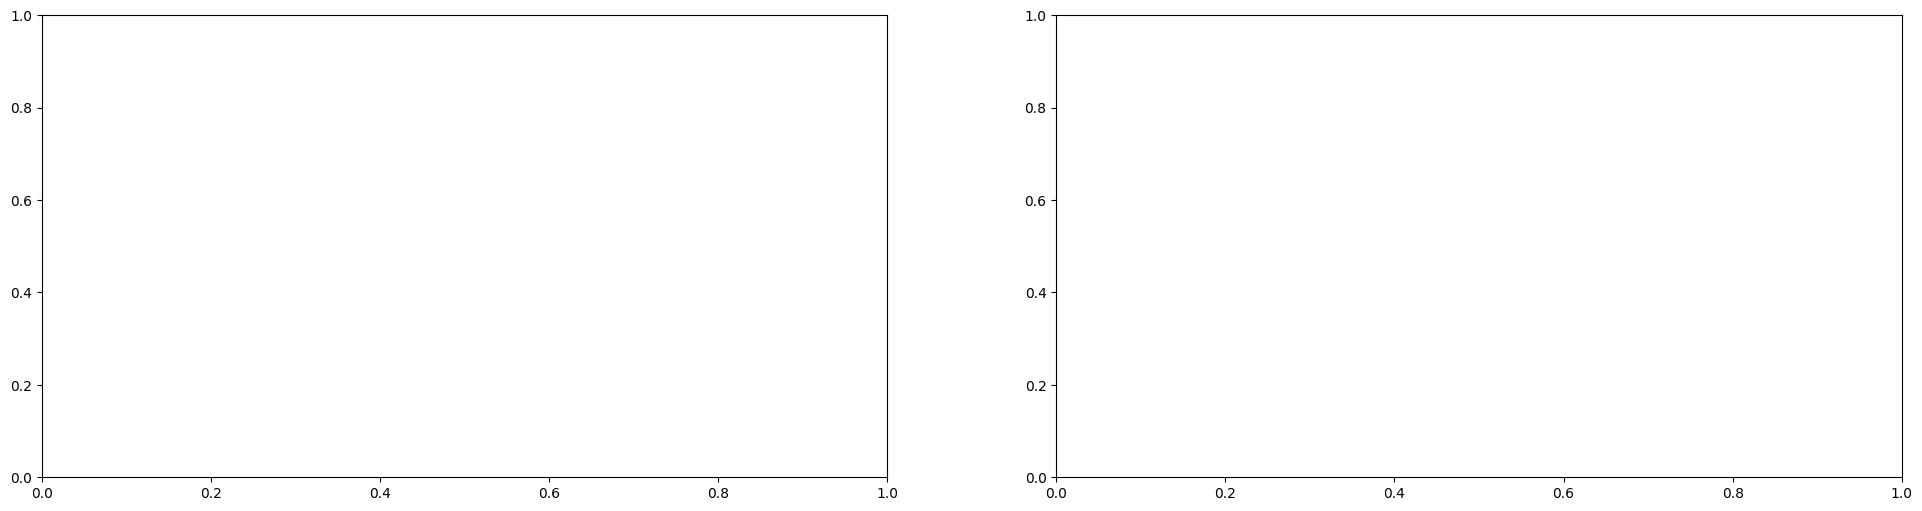

In [87]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(24,6))

<ipython-input-88-225980f5cde0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="payment_value", y="product_category_name", data=jumlah_pesanan_product.head(5), palette=colors, ax=ax[0])
<ipython-input-88-225980f5cde0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="payment_value", y="product_category_name", data=jumlah_pesanan_product.sort_values(by="payment_value", ascending=True).head(5), palette=colors, ax=ax[1])


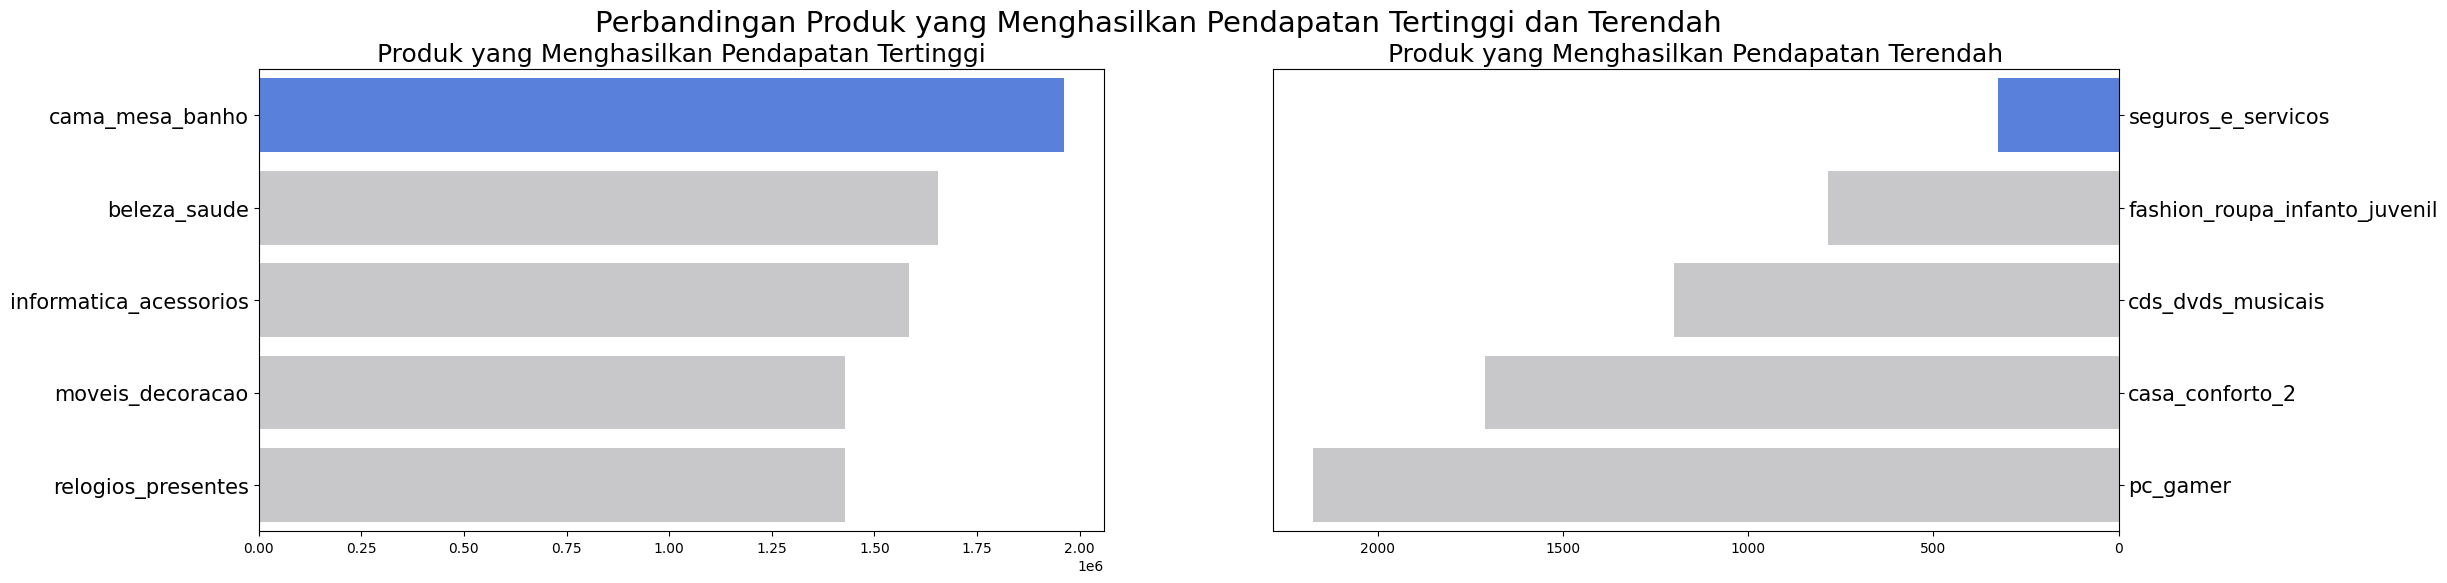

In [88]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors=["#4379F2","#C7C8CC","#C7C8CC","#C7C8CC","#C7C8CC"]


sns.barplot(x="payment_value", y="product_category_name", data=jumlah_pesanan_product.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk yang Menghasilkan Pendapatan Tertinggi", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)


sns.barplot(x="payment_value", y="product_category_name", data=jumlah_pesanan_product.sort_values(by="payment_value", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk yang Menghasilkan Pendapatan Terendah", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)


plt.suptitle("Perbandingan Produk yang Menghasilkan Pendapatan Tertinggi dan Terendah", fontsize=21)
plt.show()



**Insight:**
- Mengetahui kategori produk dengan pendapatan teratas dan terendah yang tentunya berpengaruh terhadap pendapatan yang diperoleh perusahaan


### Pertanyaan 3 : Bagaimana demografi pelanggan?

#### Berdasarkan Kota

In [89]:
city_df=df.groupby(by="customer_city").customer_id.nunique().reset_index().sort_values(by="customer_id", ascending=False)
city_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
city_df

,customer_city,customer_count
3588,sao paulo,15402
3147,rio de janeiro,6834
452,belo horizonte,2750
557,brasilia,2116
1141,curitiba,1510
...,...,...
1563,ibarama,1
3156,rio espera,1
3155,rio dos indios,1
3154,rio dos cedros,1


<ipython-input-90-7f1a39cd2905>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_count", y="customer_city", data=city_df.head(5), palette=colors)


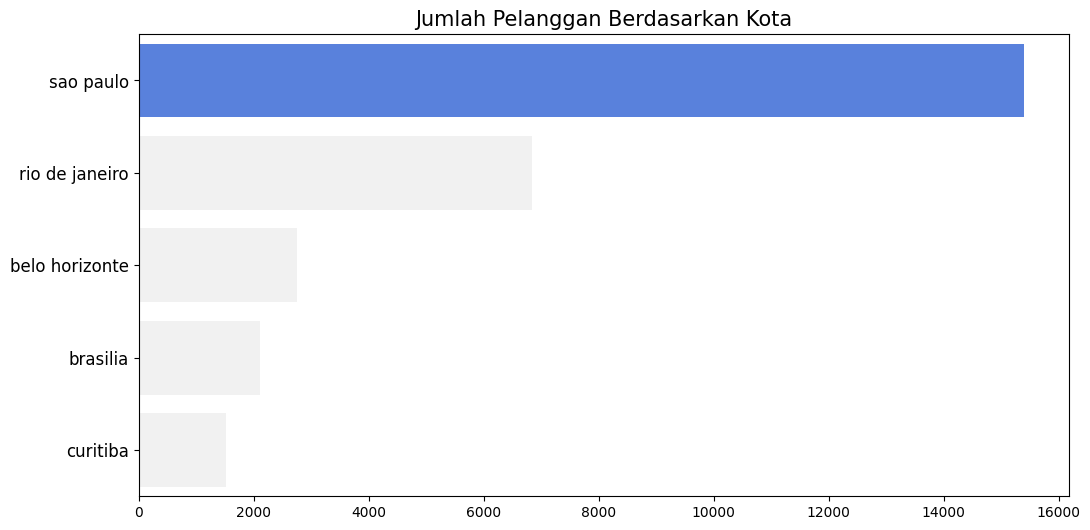

In [90]:
plt.figure(figsize=(12, 6))
colors=["#4379F2","#B7B7B7","#B7B7B7","#B7B7B7","#B7B7B7"]
sns.barplot(x="customer_count", y="customer_city", data=city_df.head(5), palette=colors)
plt.title('Jumlah Pelanggan Berdasarkan Kota', loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

#### Berdasarkan Negara

In [91]:
negara_df=df.groupby(by="customer_state").customer_id.nunique().reset_index().sort_values(by="customer_id", ascending=False)
negara_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

negara_df

,customer_state,customer_count
25,SP,41374
18,RJ,12762
10,MG,11544
22,RS,5432
17,PR,4998
23,SC,3612
4,BA,3358
6,DF,2125
7,ES,2025
8,GO,2007


<ipython-input-92-a31df895fa16>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_count", y="customer_state", data=negara_df.sort_values(by="customer_count", ascending=False).head(5), palette=colors)


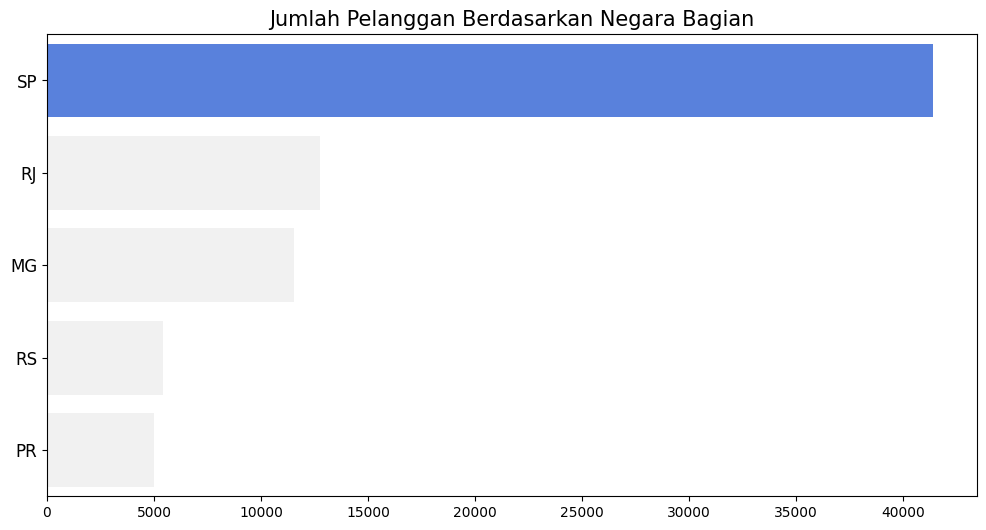

In [92]:
plt.figure(figsize=(12, 6))
sns.barplot(x="customer_count", y="customer_state", data=negara_df.sort_values(by="customer_count", ascending=False).head(5), palette=colors)
plt.title('Jumlah Pelanggan Berdasarkan Negara Bagian', loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- Visualisasi demografi pelanggan berdasarkan kota menunjukkan jumlah pelanggan terbanyak ada di sao paulo
- Visualisasi demografi pelanggan berdasarkan negara bagian menunjukkan jumlah pelanggan terbanyak ada di SP

### Pertanyaan 4 : Berapa persentase pesanan yang dikirim tepat waktu dibandingkan dengan yang terlambat?




In [93]:
df.head()

,product_id,product_category_name,order_id,order_item_id,price,customer_id,customer_city,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,status_pengiriman,payment_type,payment_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,10.91,f8a3e963a310aa58b60a5b1fed5bceb5,mogi-guacu,SP,delivered,2018-04-24 16:16:53,2018-04-27 16:42:17,2018-05-09,Tepat Waktu,debit_card,18.30
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,1,248.00,03fc97548af8f58fefc768d12b546c9c,rio de janeiro,RJ,delivered,2018-01-31 18:55:36,2018-02-16 13:27:08,2018-02-22,Tepat Waktu,voucher,265.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,1,79.80,e41819d1c95c12c9ce495b630eab8aee,sao paulo,SP,delivered,2018-07-09 21:18:01,2018-07-11 23:24:16,2018-07-18,Tepat Waktu,credit_card,87.62
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,112.30,322162b5ca010c2b059cb5224dd818b1,sao paulo,SP,delivered,2018-08-03 08:55:50,2018-08-06 15:14:32,2018-08-08,Tepat Waktu,credit_card,121.84
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,1,37.90,c11c31965ff02cc1d7132df8edfcbc22,sao paulo,SP,delivered,2018-04-11 01:06:37,2018-04-13 22:41:44,2018-04-26,Tepat Waktu,credit_card,46.19


In [94]:
status_pengiriman_df=df.groupby(by="status_pengiriman").order_id.nunique().reset_index()
status_pengiriman_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)
status_pengiriman_df


,status_pengiriman,order_count
0,Tepat Waktu,89688
1,Terlambat,8977


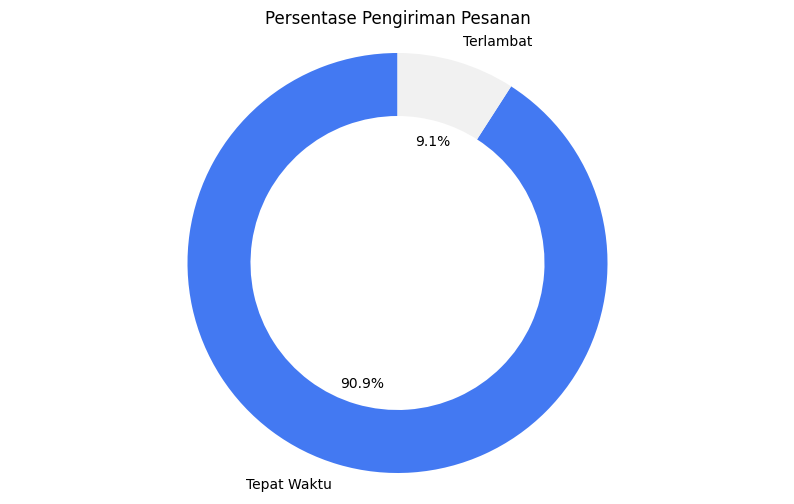

In [101]:
colors = ["#4379F2", "#F1F1F1"]
labels = status_pengiriman_df['status_pengiriman']
sizes = status_pengiriman_df['order_count']

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops=dict(width=0.3))
ax.axis('equal')
plt.title("Persentase Pengiriman Pesanan", loc="center")
plt.show()

**Insight:**
- Dari visualisasi pie chart terlihat bahwa persentase pengiriman tepat waktu lebih besar dibandingkan dengan pengiriman terlambat.


### Pertanyaan 5: Apa jenis pembayaran yang paling umum digunakan oleh pelanggan?

In [102]:
df.head()

,product_id,product_category_name,order_id,order_item_id,price,customer_id,customer_city,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,status_pengiriman,payment_type,payment_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,10.91,f8a3e963a310aa58b60a5b1fed5bceb5,mogi-guacu,SP,delivered,2018-04-24 16:16:53,2018-04-27 16:42:17,2018-05-09,Tepat Waktu,debit_card,18.30
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,1,248.00,03fc97548af8f58fefc768d12b546c9c,rio de janeiro,RJ,delivered,2018-01-31 18:55:36,2018-02-16 13:27:08,2018-02-22,Tepat Waktu,voucher,265.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,1,79.80,e41819d1c95c12c9ce495b630eab8aee,sao paulo,SP,delivered,2018-07-09 21:18:01,2018-07-11 23:24:16,2018-07-18,Tepat Waktu,credit_card,87.62
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,112.30,322162b5ca010c2b059cb5224dd818b1,sao paulo,SP,delivered,2018-08-03 08:55:50,2018-08-06 15:14:32,2018-08-08,Tepat Waktu,credit_card,121.84
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,1,37.90,c11c31965ff02cc1d7132df8edfcbc22,sao paulo,SP,delivered,2018-04-11 01:06:37,2018-04-13 22:41:44,2018-04-26,Tepat Waktu,credit_card,46.19


In [103]:
payment_df=df.groupby(by="payment_type").order_id.nunique().reset_index()
payment_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)
payment_df

,payment_type,order_count
0,boleto,19614
1,credit_card,75991
2,debit_card,1521
3,voucher,3766


<ipython-input-104-f59d1ef71c5e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_count", y="payment_type", data=payment_df.sort_values(by="order_count", ascending=False).head(5), palette=colors)


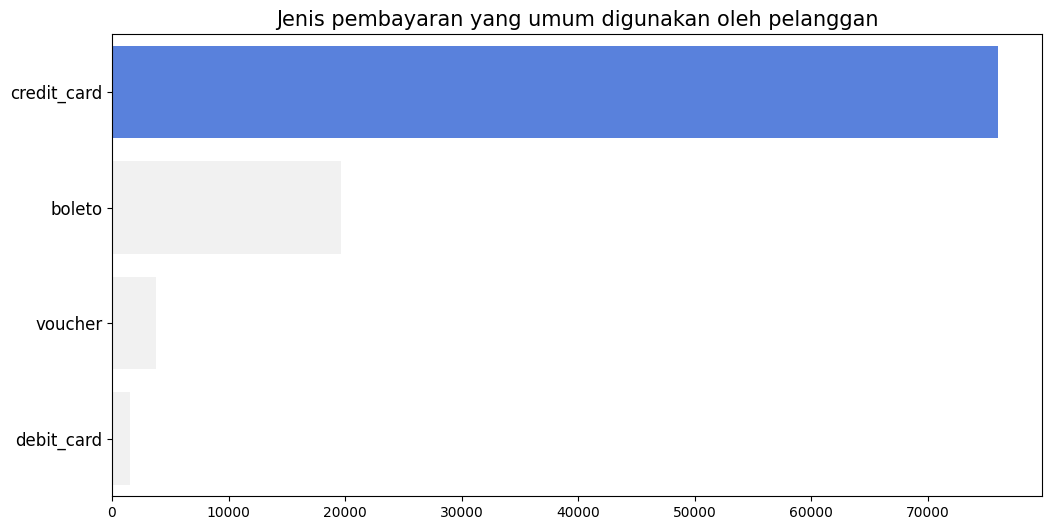

In [104]:
plt.figure(figsize=(12, 6))
colors=["#4379F2","#F1F1F1","#F1F1F1","#F1F1F1"]
sns.barplot(x="order_count", y="payment_type", data=payment_df.sort_values(by="order_count", ascending=False).head(5), palette=colors)
plt.title('Jenis pembayaran yang umum digunakan oleh pelanggan', loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

- Berdasarkan visualisasi bar chart, jenis pembayaran yang paling banyak digunakan oleh pelanggan adalah "credit_card".

### Pertanyaan 6:Berapa rata-rata waktu pengiriman yang diperlukan setiap negara bagian?

In [125]:
df.head(5)

,product_id,product_category_name,order_id,order_item_id,price,customer_id,customer_city,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,status_pengiriman,payment_type,payment_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,10.91,f8a3e963a310aa58b60a5b1fed5bceb5,mogi-guacu,SP,delivered,2018-04-24 16:16:53,2018-04-27 16:42:17,2018-05-09,Tepat Waktu,debit_card,18.30
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,1,248.00,03fc97548af8f58fefc768d12b546c9c,rio de janeiro,RJ,delivered,2018-01-31 18:55:36,2018-02-16 13:27:08,2018-02-22,Tepat Waktu,voucher,265.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,1,79.80,e41819d1c95c12c9ce495b630eab8aee,sao paulo,SP,delivered,2018-07-09 21:18:01,2018-07-11 23:24:16,2018-07-18,Tepat Waktu,credit_card,87.62
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,112.30,322162b5ca010c2b059cb5224dd818b1,sao paulo,SP,delivered,2018-08-03 08:55:50,2018-08-06 15:14:32,2018-08-08,Tepat Waktu,credit_card,121.84
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,1,37.90,c11c31965ff02cc1d7132df8edfcbc22,sao paulo,SP,delivered,2018-04-11 01:06:37,2018-04-13 22:41:44,2018-04-26,Tepat Waktu,credit_card,46.19


In [126]:
df['waktu_pengiriman'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
rata_rata_waktu_pengiriman_negara = df.groupby('customer_state')['waktu_pengiriman'].mean().reset_index()
rata_rata_waktu_pengiriman_negara.sort_values(by='waktu_pengiriman', ascending=False, inplace=True)
rata_rata_waktu_pengiriman_negara

,customer_state,waktu_pengiriman
21,RR,40.923077
3,AP,30.309524
2,AM,26.730994
1,AL,26.275109
13,PA,24.692722
12,MT,24.131133
20,RO,22.608392
9,MA,22.432977
16,PI,21.513089
14,PB,21.215190


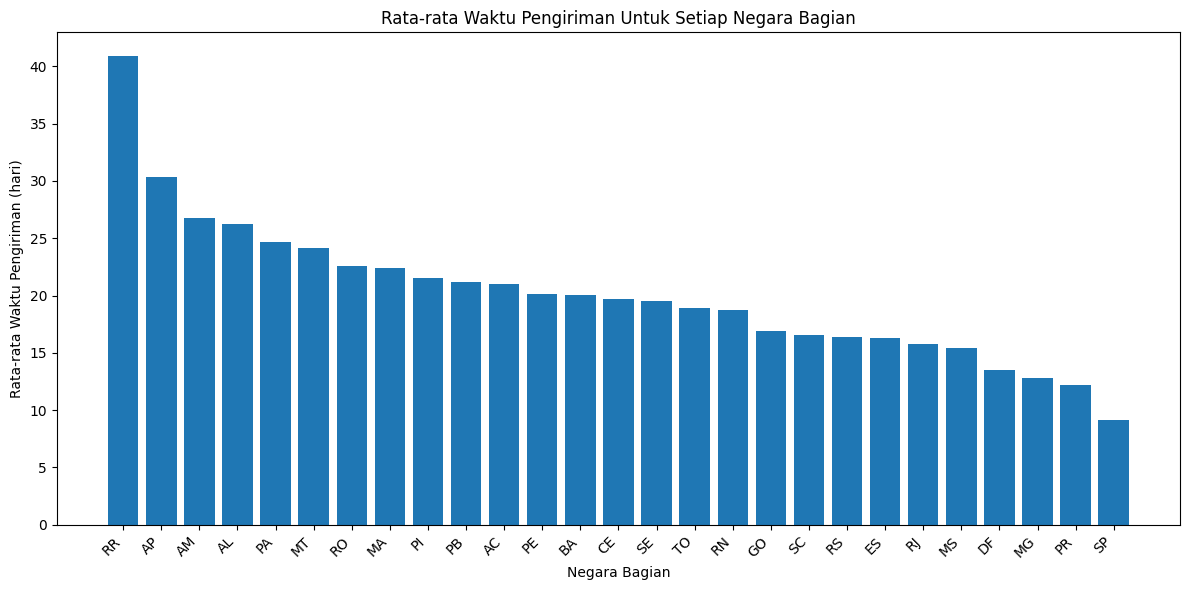

In [127]:
plt.figure(figsize=(12, 6))
plt.bar(rata_rata_waktu_pengiriman_negara['customer_state'], rata_rata_waktu_pengiriman_negara['waktu_pengiriman'])
plt.xlabel('Negara Bagian')
plt.ylabel('Rata-rata Waktu Pengiriman (hari)')
plt.title('Rata-rata Waktu Pengiriman Untuk Setiap Negara Bagian')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Insight:**
-  Berdasarkan visualisasi bar chart, dapat dilihat bahwa rata-rata waktu pengiriman bervariasi antar negara bagian. Beberapa negara bagian memiliki rata-rata waktu pengiriman yang lebih lama dibandingkan dengan negara bagian lainnya.

## RFM Analysis

In [105]:
# Mengelompokkan data untuk mendapatkan RFM
rfm = df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "payment_value": "sum"
})

rfm.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Menghitung recency
rfm["max_order_timestamp"] = pd.to_datetime(rfm["max_order_timestamp"])
recent_date = df["order_purchase_timestamp"].max()

# Hitung recency dalam hari
rfm["recency"] = (recent_date - rfm["max_order_timestamp"]).dt.days
rfm

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,114.74,292
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,67.41,413
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,195.42,551
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,179.35,382
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,107.01,153
...,...,...,...,...,...
98660,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,1,91.91,170
98661,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,1,81.36,157
98662,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,1,63.13,103
98663,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,1,214.13,81


In [106]:
rfm.drop(columns="max_order_timestamp", inplace=True)

In [107]:
rfm.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,292
1,000161a058600d5901f007fab4c27140,1,67.41,413
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,551
3,0002414f95344307404f0ace7a26f1d5,1,179.35,382
4,000379cdec625522490c315e70c7a9fb,1,107.01,153


In [108]:
rfm.describe(include="all")

,customer_id,frequency,monetary,recency
count,98665,98665.0,98665.000000,98665.000000
unique,98665,NaN,NaN,NaN
top,00012a2ce6f8dcda20d059ce98491703,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,1.0,205.596705,244.811017
std,NaN,0.0,620.581923,153.386320
min,NaN,1.0,6.150000,0.000000
25%,NaN,1.0,62.640000,121.000000
50%,NaN,1.0,109.500000,226.000000
75%,NaN,1.0,195.880000,355.000000


In [109]:
rfm.sort_values(by="monetary", ascending=False)

,customer_id,frequency,monetary,recency
8475,1617b1357756262bfa56ab541c47bc16,1,109312.64,338
73310,bd5d39761aa56689a265d95d8d32b8be,1,45256.00,375
73567,be1b70680b9f9694d8c70f41fa3dc92b,1,44048.00,192
2049,05455dfa7cd02f13d132aa7a6a9729c6,1,36489.24,282
12307,1ff773612ab8934db89fd5afa8afe506,1,30186.00,136
...,...,...,...,...
84499,da9d48cb8449edad3619186b3dd0c180,1,10.06,20
64611,a790343ca6f3fee08112d678b43aa7c5,1,9.59,8
76608,c5ea6b40204131fb48bdf66d273d7f15,1,8.86,390
1833,04bac030c0366892396bc49c1c64a8e5,1,6.18,298


In [110]:
rfm.sort_values(by="frequency", ascending=False)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,292
65713,aa343f31299309e502aff3e0e5504e1f,1,177.05,176
65783,aa601b3c45980c0918042d5ca7a25054,1,58.28,171
65782,aa5f8aa4c21fe89a04e8d221d4cd8ac1,1,44.28,13
65781,aa5f87b79875f43b90b310decb62356e,1,151.58,311
...,...,...,...,...
32886,5582a1c42a6723f0fdbb6dccb54693ae,1,228.40,493
32885,5581f26ba2dcb90e8c250e0850c66172,1,41.78,302
32884,55814b1c0dcf038f760c8f30b1b1d430,1,150.69,80
32883,5581302de852c09823ec2e0fd3c46d82,1,119.79,16


In [111]:
rfm.sort_values(by="recency", ascending=True)

,customer_id,frequency,monetary,recency
29063,4b7decb9b58e2569548b8b4c8e20e8d7,1,166.46,0
6357,10a79ef2783cae3d8d678e85fde235ac,1,14.29,4
32387,54365416b7ef5599f54a6c7821d5d290,1,106.95,4
33320,56b1ac2855cc6d7950b4ffa6a9b41b0d,1,119.42,4
52936,898b7fee99c4e42170ab69ba59be0a8b,1,93.75,4
...,...,...,...,...
30522,4f3f778022aefa22b9f9e52d2c47edf3,1,65.50,699
46210,7812fcebfc5e8065d31e1bb5f0017dae,1,40.95,699
68437,b106b360fe2ef8849fbbd056f777b4d5,1,109.34,700
3329,08c5351a6aca1c1589a38f244edeee9d,1,272.46,728


<ipython-input-112-eb15d983a197>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm.sort_values(by="recency", ascending=True).head(5), ax=ax[0], palette=colors)
<ipython-input-112-eb15d983a197>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-112-eb15d983a197>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm.sort_values(by="frequency", ascending=False).head(5), ax=ax[1], palette=colors)
<ipython-input-112-eb15d983a197>:19: UserWarning: FixedFormatter should only be used together with FixedLocato

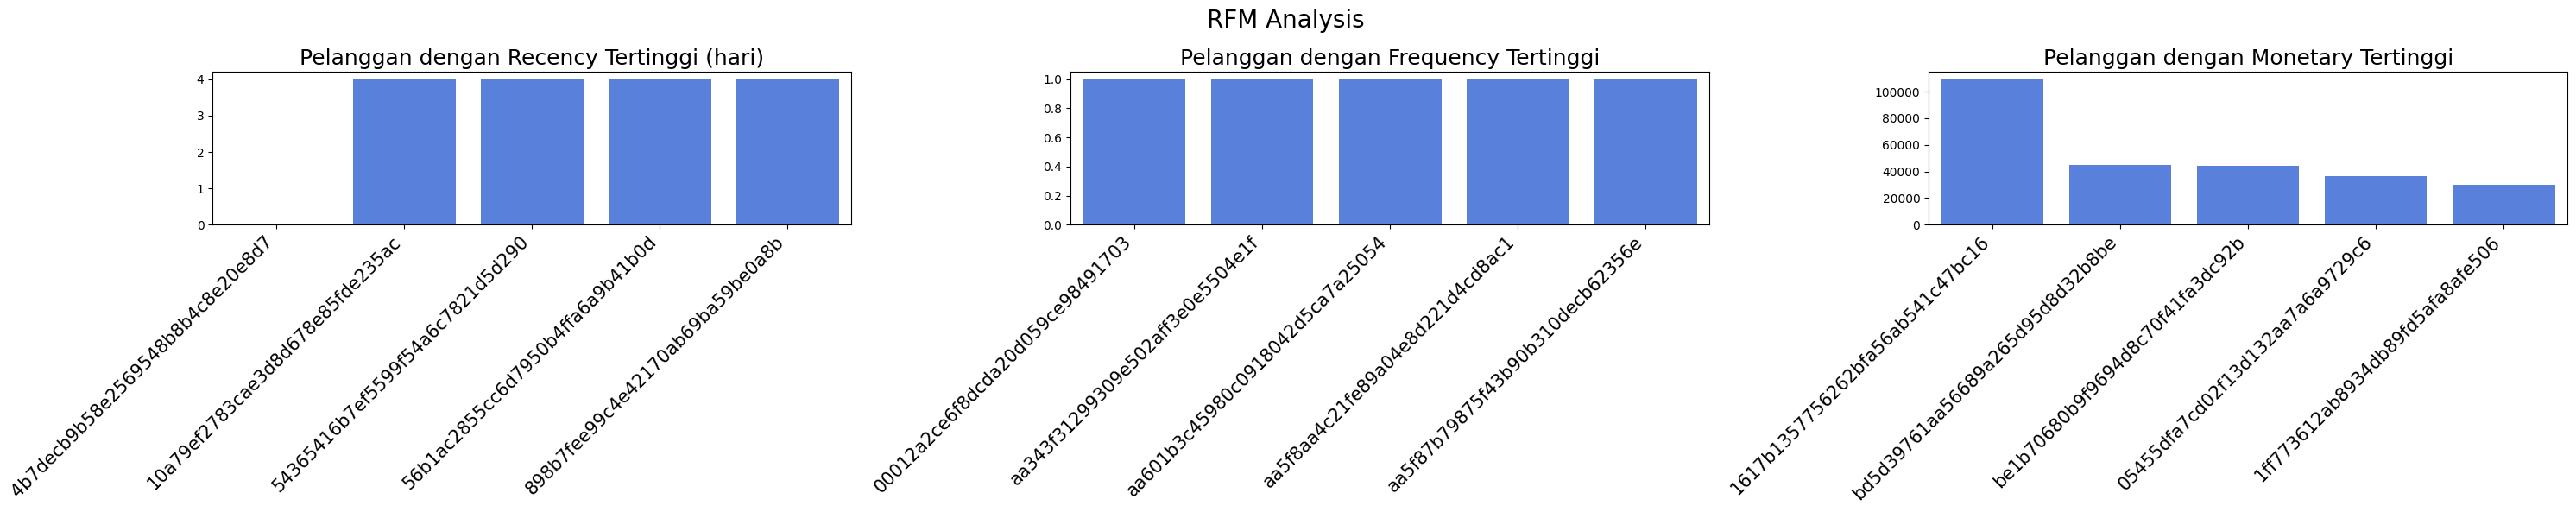

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#4379F2"] * 5

# Recency bar plot
sns.barplot(y="recency", x="customer_id", data=rfm.sort_values(by="recency", ascending=True).head(5), ax=ax[0], palette=colors)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Pelanggan dengan Recency Tertinggi (hari)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

# Frequency bar plot
sns.barplot(y="frequency", x="customer_id", data=rfm.sort_values(by="frequency", ascending=False).head(5), ax=ax[1], palette=colors)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Pelanggan dengan Frequency Tertinggi", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

# Monetary bar plot
sns.barplot(y="monetary", x="customer_id", data=rfm.sort_values(by="monetary", ascending=False).head(5), ax=ax[2], palette=colors)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Pelanggan dengan Monetary Tertinggi", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha='right')

plt.suptitle("RFM Analysis", fontsize=20)
plt.tight_layout()
plt.show()



### Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [113]:
rfm['r_rank'] = rfm['recency'].rank(ascending=True)
rfm['f_rank'] = rfm['frequency'].rank(ascending=False)
rfm['m_rank'] = rfm['monetary'].rank(ascending=False)

rfm.head()


,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,292,64712.0,49333.0,47311.0
1,000161a058600d5901f007fab4c27140,1,67.41,413,82017.0,49333.0,70597.0
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,551,95854.5,49333.0,24741.5
3,0002414f95344307404f0ace7a26f1d5,1,179.35,382,77740.0,49333.0,27742.5
4,000379cdec625522490c315e70c7a9fb,1,107.01,153,32303.5,49333.0,50344.5


In [114]:
rfm['r_rank_norm'] = (rfm['r_rank'] / rfm['r_rank'].max()) * 100
rfm['f_rank_norm'] = (rfm['f_rank'] / rfm['f_rank'].max()) * 100
rfm['m_rank_norm'] = (rfm['m_rank'] / rfm['m_rank'].max()) * 100

rfm['RFM_Score'] = rfm['r_rank_norm'] + rfm['f_rank_norm'] + rfm['m_rank_norm']

sorted_by_rfm = rfm.sort_values(by='RFM_Score', ascending=True)

sorted_by_rfm



,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank,r_rank_norm,f_rank_norm,m_rank_norm,RFM_Score
26367,448945bc713d98b6726e82eda6249b9e,1,2486.25,5,30.0,49333.0,444.0,0.030406,100.0,0.450008,100.480414
95434,f767e7437c3aa2c044523c0a6712380b,1,2328.40,8,218.5,49333.0,491.0,0.221458,100.0,0.497644,100.719101
17941,2e9ae3e10bcfcc16fe0eedc2ac5f9f6a,1,2187.42,10,414.0,49333.0,548.5,0.419604,100.0,0.555922,100.975525
54358,8d4fbbdcabdfc2f9b1f52cd523ea5865,1,2755.98,13,1025.5,49333.0,378.0,1.039381,100.0,0.383115,101.422496
32418,544718803ece964e5c1d0b3b3cd751fc,1,1312.67,8,218.5,49333.0,1469.5,0.221458,100.0,1.489383,101.710841
...,...,...,...,...,...,...,...,...,...,...,...
89143,e6bee29442c761ff0dfb9a4414922a5c,1,16.62,605,98338.5,49333.0,98536.5,99.669587,100.0,99.869761,299.539349
15084,27129ce1ebca4ffa23a049c51cc8ec95,1,15.62,605,98338.5,49333.0,98582.5,99.669587,100.0,99.916384,299.585971
24376,3f402674c608ea67085eb5e0ec4d96ef,1,15.62,605,98338.5,49333.0,98582.5,99.669587,100.0,99.916384,299.585971
81495,d2c63ad286e3ca9dd69218008d61ff81,1,11.62,605,98338.5,49333.0,98656.0,99.669587,100.0,99.990878,299.660466


In [115]:
sorted_by_rfm.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
sorted_by_rfm

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm,RFM_Score
26367,448945bc713d98b6726e82eda6249b9e,1,2486.25,5,0.030406,100.0,0.450008,100.480414
95434,f767e7437c3aa2c044523c0a6712380b,1,2328.40,8,0.221458,100.0,0.497644,100.719101
17941,2e9ae3e10bcfcc16fe0eedc2ac5f9f6a,1,2187.42,10,0.419604,100.0,0.555922,100.975525
54358,8d4fbbdcabdfc2f9b1f52cd523ea5865,1,2755.98,13,1.039381,100.0,0.383115,101.422496
32418,544718803ece964e5c1d0b3b3cd751fc,1,1312.67,8,0.221458,100.0,1.489383,101.710841
...,...,...,...,...,...,...,...,...
89143,e6bee29442c761ff0dfb9a4414922a5c,1,16.62,605,99.669587,100.0,99.869761,299.539349
15084,27129ce1ebca4ffa23a049c51cc8ec95,1,15.62,605,99.669587,100.0,99.916384,299.585971
24376,3f402674c608ea67085eb5e0ec4d96ef,1,15.62,605,99.669587,100.0,99.916384,299.585971
81495,d2c63ad286e3ca9dd69218008d61ff81,1,11.62,605,99.669587,100.0,99.990878,299.660466


In [116]:
sorted_by_rfm[["customer_id","RFM_Score"]].sort_values(by="RFM_Score", ascending=False)

,customer_id,RFM_Score
29152,4bb880cac21c7a9e1371ab1ebd601706,299.679724
81495,d2c63ad286e3ca9dd69218008d61ff81,299.660466
24376,3f402674c608ea67085eb5e0ec4d96ef,299.585971
15084,27129ce1ebca4ffa23a049c51cc8ec95,299.585971
89143,e6bee29442c761ff0dfb9a4414922a5c,299.539349
...,...,...
32418,544718803ece964e5c1d0b3b3cd751fc,101.710841
54358,8d4fbbdcabdfc2f9b1f52cd523ea5865,101.422496
17941,2e9ae3e10bcfcc16fe0eedc2ac5f9f6a,100.975525
95434,f767e7437c3aa2c044523c0a6712380b,100.719101


### Segmentasi customer berdasarkan RFM_score

In [117]:
def segment_customer(df):
  if df['RFM_Score'] >= 250:
    return 'Champion'
  elif df['RFM_Score'] >= 200:
    return 'Loyal Customer'
  elif df['RFM_Score'] >= 150:
    return 'Potential Loyalist'
  elif df['RFM_Score'] >= 100:
    return 'Recent Customer'
  elif df['RFM_Score'] >= 50:
    return 'Promising'
  elif df['RFM_Score'] >= 1:
    return 'Customer Need Attention'
  else:
    return 'Lost'


sorted_by_rfm['Segment'] = sorted_by_rfm.apply(segment_customer, axis=1)

segment_counts = sorted_by_rfm.groupby('Segment')['customer_id'].nunique().sort_values(ascending=False)
segment_counts.head()


,customer_id
Segment,
Loyal Customer,36974
Potential Loyalist,36846
Recent Customer,12523
Champion,12322


<ipython-input-124-c9c42e461c7d>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_counts = sorted_by_rfm.groupby('Segment')['customer_id'].nunique().reset_index()
<ipython-input-124-c9c42e461c7d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_id',y='Segment', data=segment_counts.sort_values(by="Segment"), palette=colors)
<ipython-input-124-c9c42e461c7d>:11: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='customer_id',y='Segment', data=segment_counts.sort_values(by="Segment"), palette=colors)


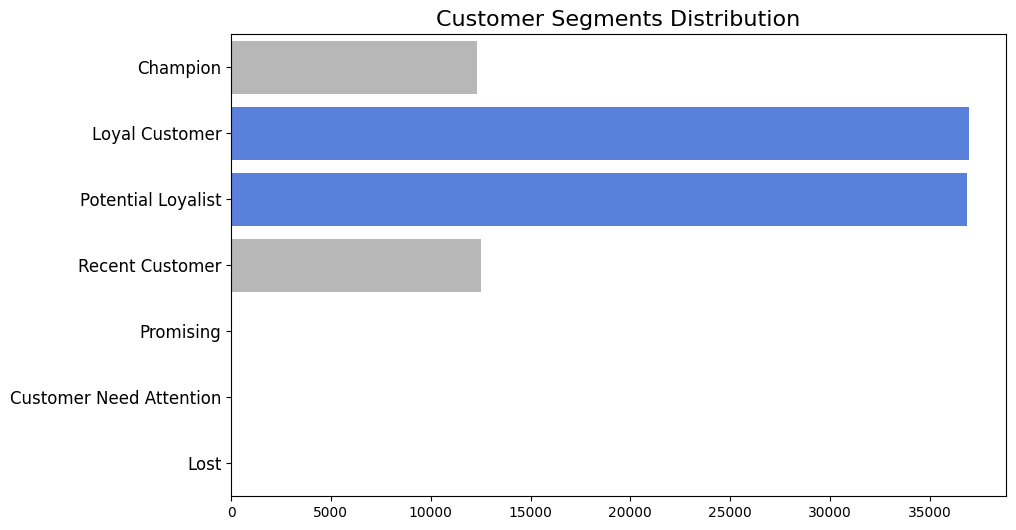

In [124]:
sorted_by_rfm['Segment'] = pd.Categorical(
    sorted_by_rfm['Segment'],
    categories=["Champion", "Loyal Customer", "Potential Loyalist", "Recent Customer", "Promising", "Customer Need Attention", "Lost"],
    ordered=True
)

colors = [ "#B7B7B7", "#4379F2","#4379F2", "#B7B7B7"]
segment_counts = sorted_by_rfm.groupby('Segment')['customer_id'].nunique().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='customer_id',y='Segment', data=segment_counts.sort_values(by="Segment"), palette=colors)

plt.title('Customer Segments Distribution', fontsize=16)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1 :
Berdasarkan visualisasi tren penjualan bulanan pada tahun 2018, dapat disimpulkan bahwa terdapat fluktuasi dalam jumlah pesanan
setiap bulannya.Pada bulan januari terjadi peningkatan jumlah pesanan sedangkan penurunan jumlah pesanan secara signifikan terjadi pada bulan Februari,Juni dan September. Informasi ini dapat digunakan untuk mengidentifikasi pola musiman atau tren yang dapat memengaruhi penjualan, dan dapat digunakan untuk perencanaan strategi pemasaran atau promosi di masa mendatang.

- Conclution pertanyaan 2 : Kesimpulan untuk pertanyaan 2: Berdasarkan analisis yang telah dilakukan, kategori produk "beleza_saude" dan "informatica_acessorios" merupakan kategori produk yang menghasilkan pendapatan tertinggi bagi perusahaan. Sebaliknya, kategori produk "portateis_cozinha_e_preparadores_de_alimentos" dan "cds_dvds_musicais" merupakan kategori produk yang menghasilkan pendapatan terendah.Perusahaan perlu fokus pada pengembangan dan promosi kategori produk "beleza_saude" dan "informatica_acessorios" karena memberikan kontribusi pendapatan yang signifikan. Selain itu, perusahaan perlu mengevaluasi kategori produk "portateis_cozinha_e_preparadores_de_alimentos" dan "cds_dvds_musicais". Strategi pemasaran dan penawaran produk mungkin perlu disesuaikan untuk meningkatkan pendapatan dari kategori produk tersebut.

- Conclution pertanyaan 3 : Demografi Pelanggan menunjukkan bahwa berdasarkan analisis demografi, Sao Paulo merupakan kota dengan jumlah pelanggan terbanyak, dan SP (Negara Bagian) juga merupakan lokasi dengan jumlah pelanggan terbanyak. Informasi ini dapat menjadi acuan untuk strategi pemasaran dan penyesuaian layanan, khususnya untuk menjangkau target pasar di kota Sao Paulo dan Negara Bagian SP.

- Conclution pertanyaan 4 : Dari visualisasi pie chart terlihat bahwa persentase pengiriman tepat waktu lebih besar dibandingkan dengan pengiriman terlambat. Hal ini menunjukkan bahwa perusahaan memiliki kinerja yang baik dalam hal pengiriman tepat waktu. Namun, perlu tetap diperhatikan pengiriman yang terlambat untuk meningkatkan kepuasan pelanggan. Perusahaan dapat terus meningkatkan kinerja pengiriman tepat waktu agar dapat meningkatkan kepuasan pelanggan. Selain itu, perusahaan dapat menganalisis penyebab pengiriman yang terlambat dan mencari solusi untuk meminimalkannya.

- Conclution pertanyaan 5 : Berdasarkan visualisasi bar chart, jenis pembayaran yang paling banyak digunakan oleh pelanggan adalah "credit_card." Hal ini menunjukkan bahwa penggunaan kartu kredit menjadi metode pembayaran yang paling populer di platform e-commerce ini. Saran: Perusahaan dapat berfokus pada promosi dan penawaran khusus untuk pengguna kartu kredit, serta memastikan proses pembayaran melalui kartu kredit berjalan lancar dan aman.

- Conclution pertanyaan 6 : Berdasarkan analisis rata-rata waktu pengiriman untuk setiap negara bagian, dapat disimpulkan bahwa terdapat variasi waktu pengiriman yang cukup signifikan antar negara bagian. Beberapa negara bagian memiliki rata-rata waktu pengiriman yang lebih lama dibandingkan dengan negara bagian lainnya. Hal ini dapat disebabkan oleh berbagai faktor seperti jarak, infrastruktur logistik, dan kebijakan pengiriman di setiap daerah. Memahami variasi waktu pengiriman ini dapat membantu perusahaan untuk meningkatkan strategi logistik dan pengiriman, misalnya dengan mengoptimalkan jalur pengiriman atau meningkatkan layanan pengiriman di negara bagian dengan waktu pengiriman yang lebih lama. Selain itu, perusahaan juga dapat memberikan informasi yang lebih akurat tentang estimasi waktu pengiriman kepada pelanggan, sehingga dapat meningkatkan kepuasan pelanggan.
